In [25]:
import csv
import os
import numpy as np
import random
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager as fm, rcParams
from sklearn import ensemble, tree, linear_model
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
listings_data = pd.read_csv('shanghai_detailed/listings.csv',encoding="utf-8")
calendar_data = pd.read_csv('shanghai_detailed/calendar.csv',encoding="utf-8")
reviews_data = pd.read_csv('shanghai_detailed/reviews.csv',encoding="utf-8")
neighbour=pd.read_csv('shanghai_detailed/neighbourhoods.csv',encoding="utf-8")

In [9]:
listings_data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24963,https://www.airbnb.com/rooms/24963,20210222161123,2021-02-24,Heart of French Concession / Home,The flat is located in the heart of formal Fre...,"It's Shanghai Music Concession adjacent, lots ...",https://a0.muscache.com/pictures/560599/168338...,98203,https://www.airbnb.com/users/show/98203,...,9.0,10.0,9.0,NaN,f,2,2,0,0,0.67
1,24991,https://www.airbnb.com/rooms/24991,20210222161123,2021-02-24,French Concession Yongkang area,<b>The space</b><br />Location: two bedroom ap...,"Close to subway line 10/12, and line 1 South S...",https://a0.muscache.com/pictures/14647962/113e...,98203,https://www.airbnb.com/users/show/98203,...,10.0,8.0,10.0,NaN,f,2,2,0,0,0.01
2,139828,https://www.airbnb.com/rooms/139828,20210222161123,2021-02-24,【sidihome】The minimalist business apt In jing’an,[SidiHome·Minimal Series] The bedrooms are all...,"Central location, easy to get subway station l...",https://a0.muscache.com/pictures/fbf59417-707f...,681552,https://www.airbnb.com/users/show/681552,...,10.0,9.0,9.0,NaN,t,7,7,0,0,0.24
3,161932,https://www.airbnb.com/rooms/161932,20210222161123,2021-02-24,Sublet 1BR in Shanghai July 1-Aug 1,My place is close to art and culture and resta...,NaN,https://a0.muscache.com/pictures/f4917e85-7638...,774393,https://www.airbnb.com/users/show/774393,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,185736,https://www.airbnb.com/rooms/185736,20210222161123,2021-02-24,Apt in French Concession巨鹿路/富民路,This well-appointed apt located in the trendy ...,NaN,https://a0.muscache.com/pictures/53fa6866-a7ae...,891951,https://www.airbnb.com/users/show/891951,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.15
5,350728,https://www.airbnb.com/rooms/350728,20210222161123,2021-02-24,'Laojia' in the Heart of Shanghai,In 10 years I've hosted over 800 people throug...,What I love most? The local fresh market where...,https://a0.muscache.com/pictures/9235c3f9-80e0...,1777552,https://www.airbnb.com/users/show/1777552,...,10.0,10.0,9.0,NaN,f,1,0,1,0,0.79
6,427038,https://www.airbnb.com/rooms/427038,20210222161123,2021-02-23,In the heart of French Concession.,<b>The space</b><br />Location and surrounding...,NaN,https://a0.muscache.com/pictures/4885018/ccff0...,2122588,https://www.airbnb.com/users/show/2122588,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7,479517,https://www.airbnb.com/rooms/479517,20210222161123,2021-02-24,有简约 绿色系 功能齐全 高楼层的绿色舒适7/13双轨交阳光暖窝公寓,绿色系的房间，化繁为简，通过房间简单的元素的搭配，合理的空间布局，全新的装修配置，塑造一个通...,"市中心,江宁路,靠近新会路,距离地铁站也很近。著名的玉佛寺就在一街之隔,大卖场,便利店,购物...",https://a0.muscache.com/pictures/49ab17e5-e199...,681552,https://www.airbnb.com/users/show/681552,...,10.0,10.0,10.0,NaN,t,7,7,0,0,0.66
8,479530,https://www.airbnb.com/rooms/479530,20210222161123,2021-02-24,【sidihome】ROSE the big space apt in downtown,"[SidiHome, The Nordic style] The background of...","Central location, easy to get subway station l...",https://a0.muscache.com/pictures/fe378965-8736...,681552,https://www.airbnb.com/users/show/681552,...,10.0,10.0,10.0,NaN,t,7,7,0,0,0.32
9,496972,https://www.airbnb.com/rooms/496972,20210222161123,2021-02-24,Free Airport pickup! Modern Stylish Master Bed...,Hello world! I'm very excited to welcome you t...,This beautiful and clean area in Shanghai is ...,https://a0.muscache.com/pictures/6822113/bacdf...,2454164,https://www.airbnb.com/users/show/2454164,...,10.0,10.0,10.0,NaN,f,5,0,4,1,0.75


In [5]:
listings_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

In [42]:
calendar_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1825216,2021-02-25,t,$135.00,$135.00,1.0,1125.0
1,24963,2021-02-24,f,$452.00,$452.00,3.0,365.0
2,24963,2021-02-25,f,$452.00,$452.00,3.0,365.0
3,24963,2021-02-26,f,$452.00,$452.00,3.0,365.0
4,24963,2021-02-27,f,$452.00,$452.00,3.0,365.0
5,24963,2021-02-28,f,$452.00,$452.00,3.0,365.0
6,24963,2021-03-01,f,$452.00,$452.00,3.0,365.0
7,24963,2021-03-02,f,$452.00,$452.00,3.0,365.0
8,24963,2021-03-03,f,$452.00,$452.00,3.0,365.0
9,24963,2021-03-04,f,$452.00,$452.00,3.0,365.0


In [37]:
reviews_data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,24963,105158,2010-09-26,125515,Lucia,Even though the actual apt listed was not read...
1,24963,191610,2011-03-03,311924,Marty,Jia's place is in a vibrant and (in my opinion...
2,24963,347084,2011-07-02,23521,Thomas,The host canceled my reservation the day befor...
3,24963,384765,2011-07-20,491296,Nikko,JIa and her apt was great! It was easy to fin...
4,24963,406458,2011-07-30,228345,Deborah And Andrew,"Clean, spacious apartment in a lovely neighbor..."
5,24963,464627,2011-08-22,561914,Nick,"This apartment is very centrally located, quit..."
6,24963,495545,2011-09-02,925817,Ypk,This was my first AirBnb experience and the ap...
7,24963,518178,2011-09-10,962875,Sophie,Jias place is just fantastic. It is in such a ...
8,24963,665659,2011-10-26,966889,Yi,This is an awesome location that's close to ev...
9,24963,708936,2011-11-11,23521,Thomas,Jia's apartment is a cosy nice place in a hous...


In [4]:
neighbourhoods_data

,neighbourhood_group,neighbourhood
0,NaN,嘉定区 / Jiading District
1,NaN,奉贤区 / Fengxian District
2,NaN,宝山区 / Baoshan District
3,NaN,崇明区 / Chongming District
4,NaN,徐汇区 / Xuhui District
5,NaN,普陀区 / Putuo District
6,NaN,杨浦区 / Yangpu District
7,NaN,松江区 / Songjiang District
8,NaN,浦东新区 / Pudong
9,NaN,虹口区 / Hongkou District


## 数据清洗

In [10]:
cleaned_list = listings_data.drop(['license','neighbourhood_group_cleansed','maximum_nights_avg_ntm','calendar_updated'], axis=1)
cleaned_list.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
cleaned_list.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
name                                            2
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64

In [12]:
cleaned_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability

In [13]:
res = cleaned_list.groupby('neighbourhood_cleansed') #按区域分组
area_list = neighbour['neighbourhood'].to_list()
neighb_counts = {}
for area in  area_list:
    counts = res.get_group(area).shape[0]
    neighb_counts[area] = counts
# neighb_counts

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/ydc/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ydc/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ydc/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ydc/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ydc/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ydc/anaconda3/lib

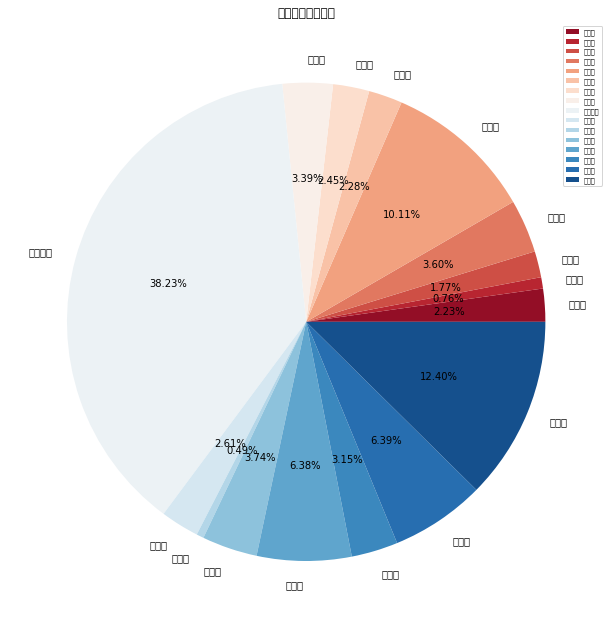

In [14]:
plt.figure(figsize=(11,11))
plt.title('各区民宿分布情况')
label = [i[0].split(' /')[0] for i in neighb_counts.items()]
data = [i[1] for i in neighb_counts.items()]
max_area = sorted(neighb_counts.items(), key=lambda x:x[1],reverse=True)[:3] #选择民宿最多的三个区突出显示
max_area = [i[0] for i in max_area]
explode = [0.1 if i in max_area else 0 for i in label]
color = sns.color_palette("RdBu", len(label))
plt.pie(data, labels = label, explode = explode, autopct='%.2f%%', colors=color)
plt.legend(loc='best', fontsize=6.5)
plt.savefig('各区分布情况.jpg')#保存图片
plt.show()

In [17]:
neighb_counts.items()

dict_items([('嘉定区 / Jiading District', 808), ('奉贤区 / Fengxian District', 277), ('宝山区 / Baoshan District', 641), ('崇明区 / Chongming District', 1308), ('徐汇区 / Xuhui District', 3671), ('普陀区 / Putuo District', 828), ('杨浦区 / Yangpu District', 888), ('松江区 / Songjiang District', 1232), ('浦东新区 / Pudong', 13877), ('虹口区 / Hongkou District', 946), ('金山区 / Jinshan District', 179), ('长宁区 / Changning District', 1358), ('闵行区 / Minhang District', 2317), ('青浦区 / Qingpu District', 1143), ("静安区 / Jing'an District", 2321), ('黄浦区 / Huangpu District', 4500)])

In [17]:
picked_columns=['id', 'name', 'host_id',
       'host_name','neighbourhood_cleansed','host_neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates','bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365',
       'number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 
       'calculated_host_listings_count', 'reviews_per_month']

In [18]:
cleaned_list = cleaned_list.drop(cleaned_list[cleaned_list['number_of_reviews']==0].index)
cleaned_list.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
name                                            1
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64

In [19]:
features = cleaned_list[picked_columns]

In [20]:
def convert_currency(var):
    """
    convert the string number to a float
    _ 去除$
    - 去除逗号，
    - 转化为浮点数类型
    """
    new_value = var.replace(",","").replace("$","")
    return float(new_value)

x = features.copy()
features.loc[:,'price'] = x["price"].apply(convert_currency)

/home/ydc/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


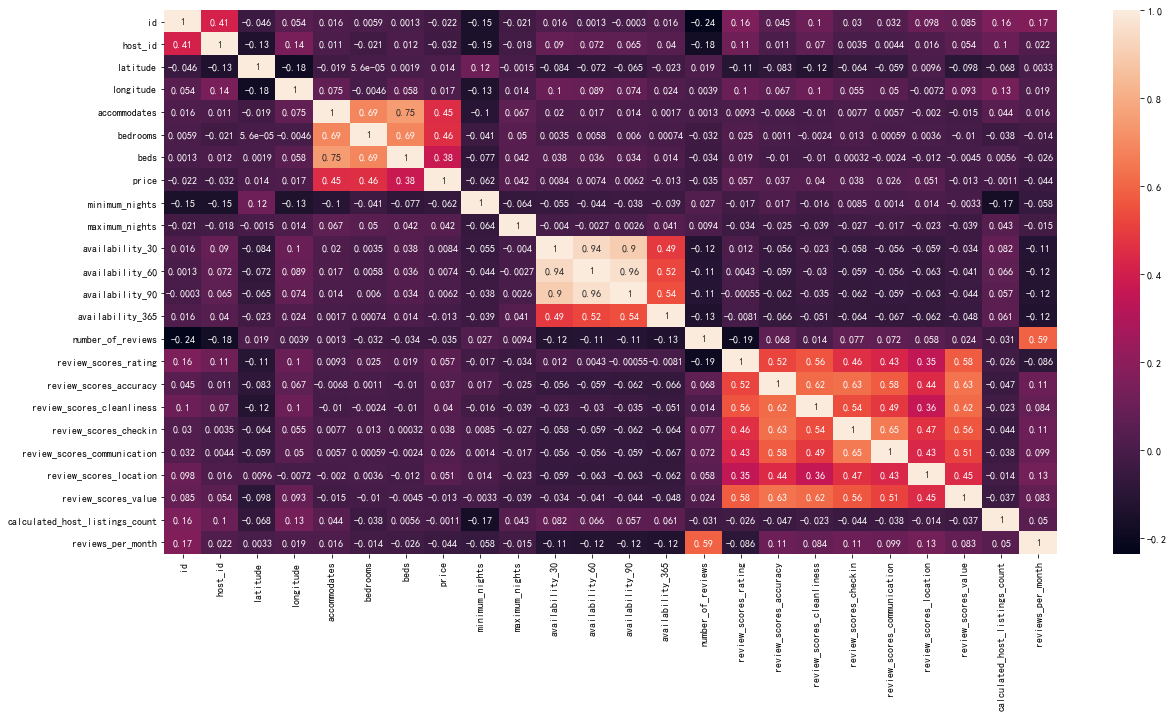

In [19]:
corr = features.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.savefig('pca.jpg')#保存图片

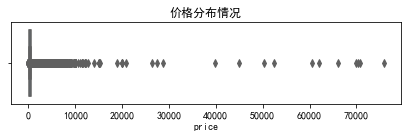

In [13]:
plt.figure(figsize=(7,1.5))
plt.title('价格分布情况')
sns.boxplot(features['price'],whis=0.5, palette="Blues")

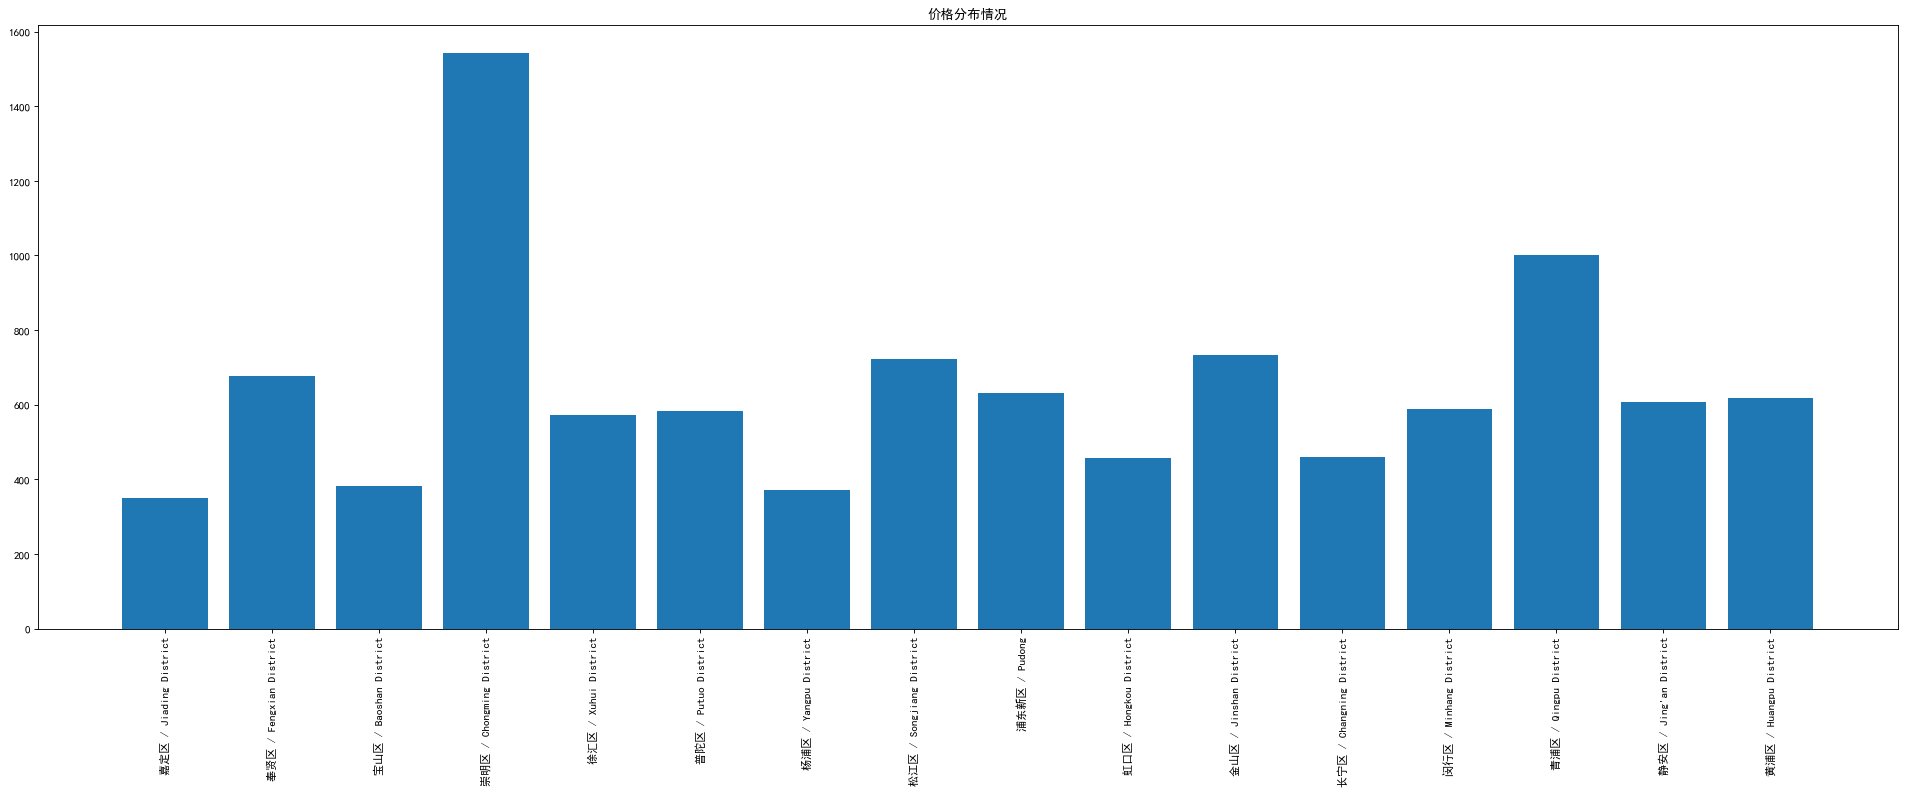

In [15]:
neighbourhood_price=pd.pivot_table(features,index="neighbourhood_cleansed",values="price",aggfunc=np.mean)
neighbourhood_price.head()

plt.figure(figsize=(30,10),dpi=80)
plt.title('价格分布情况')
plt.bar(neighbourhood_price.index,neighbourhood_price.price) 
plt.xticks(rotation=90)  # 旋转坐标标签
plt.savefig('价格分布情况.jpg')#保存图片

# Baseline

In [21]:
feature_columns=['neighbourhood_cleansed','room_type','price',
                 'minimum_nights','calculated_host_listings_count','availability_365']
data = features[feature_columns]

In [22]:
data['room_type']=data['room_type'].factorize()[0]
data['neighbourhood_cleansed']=data['neighbourhood_cleansed'].factorize()[0]
data.head()

<ipython-input-22-52177a1d58ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['room_type']=data['room_type'].factorize()[0]
<ipython-input-22-52177a1d58ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_cleansed']=data['neighbourhood_cleansed'].factorize()[0]


,neighbourhood_cleansed,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,452.0,3,2,297
1,0,0,517.0,3,2,189
2,1,0,355.0,3,7,331
4,0,1,500.0,1,1,364
5,2,1,160.0,2,1,89


In [26]:
y = data['price']
x= data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared train score: 0.014
R-squared test score: 0.002


## Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

print('R-squared train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test, y_test)))

R-squared train score: 0.014
R-squared test score: 0.002


## Lasso Regression

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))

R-squared score (training): 0.014
R-squared score (test): 0.003


In [33]:
## Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.280
R-squared score (test): -0.013


In [35]:
## Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(x_train[:100], y_train[:100])

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))